Here we select kernel dl_env

# Load Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from tensorflow.keras.applications.vgg19 import VGG19
import seaborn as sns



# Directory

In [84]:
import pathlib
path = "/Users/majeedjamakhani/MJ-IMM/Personal/Learn-update/AI-Book/Malaria_AI/Data"
data_dir = pathlib.Path(path).with_suffix('')

In [86]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

27558


In [90]:
uninfected = list(data_dir.glob("Uninfected/*"))
parasitized = list(data_dir.glob("Parasitized/*"))
print("Number of uninfected cells", len(uninfected))
print("Number of infected cells", len(parasitized))

Number of uninfected cells 13780
Number of infected cells 13780


# Displaying some examples

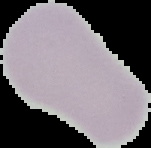

In [94]:
PIL.Image.open(uninfected[1])

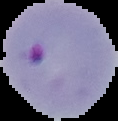

In [95]:
PIL.Image.open(parasitized[1])

In [96]:
batch_size = 32
img_height = 150
img_width = 150

In [97]:
image_gen = ImageDataGenerator(
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.3,
    rescale = 1/255
)

In [98]:
training_data = image_gen.flow_from_directory(
    data_dir,
    subset = "training",
    class_mode="binary",
    target_size = (img_width, img_height),
    batch_size = batch_size
)

validation_data = image_gen.flow_from_directory(
    data_dir,
    subset = "validation",
    class_mode="binary",
    target_size = (img_width, img_height),
    batch_size = batch_size
)

Found 19292 images belonging to 2 classes.
Found 8266 images belonging to 2 classes.


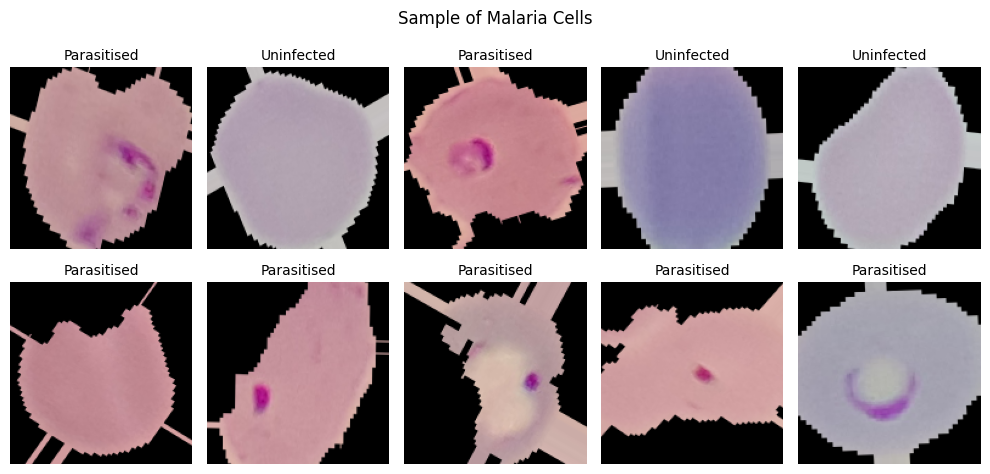

In [99]:
X_train, y_train = next(training_data)

fig = plt.figure(figsize=(10, 5))

for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(X_train[i])
    ax.axis("off")
    ax.set_title("Uninfected" if y_train[i] == 1 else "Parasitised", fontsize=10)
fig.suptitle("Sample of Malaria Cells")
plt.tight_layout()

# Model Architecture

In [100]:

input = Input(shape = (img_width, img_height, 3), dtype=tf.float32, name="malaria_cells")
X = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(input)
X = MaxPooling2D(pool_size = (2, 2))(X)
X = BatchNormalization()(X)
X = Dropout(0.3)(X)
X = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(X)
X = MaxPooling2D(pool_size = (2, 2))(X)

X = GlobalAveragePooling2D()(X)
X = Dense(512, activation="relu")(X)
X = BatchNormalization()(X)
X = Dropout(0.3)(X)
X = Dense(256, activation="relu")(X)
X = BatchNormalization()(X)
output = Dense(1, activation="sigmoid", name="cell_classes")(X)

model = Model(inputs=input, outputs=output)



In [102]:
plot_model(model, "model.png", show_layer_activations=True)
model.summary()

You must install pydot (`pip install pydot`) for `plot_model` to work.


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ malaria_cells (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cell_classes (Dense)            │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,913 (808.25 KB)

 Trainable params: 205,249 (801.75 KB)

 Non-trainable params: 1,664 (6.50 KB)

In [ ]:
# Model compilation

In [103]:
optim = tf.keras.optimizers.Adam()
loss = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=optim, loss=loss, metrics=["accuracy"])

# Train Model

In [106]:
epochs = 5

checkpoint_filepath = '/Users/majeedjamakhani/MJ-IMM/Personal/Learn-update/AI-Book/Malaria_AI/tmp/checkpoint.weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, min_delta=1e-3, restore_best_weights=True)

history = model.fit(training_data, epochs=epochs, validation_data=validation_data, callbacks=[model_checkpoint_callback, early_stopping])



Epoch 1/5


/Users/majeedjamakhani/Softwares/miniconda3/envs/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


603/603 ━━━━━━━━━━━━━━━━━━━━ 114s 187ms/step - accuracy: 0.6908 - loss: 0.6155 - val_accuracy: 0.5063 - val_loss: 0.7923
Epoch 2/5
603/603 ━━━━━━━━━━━━━━━━━━━━ 112s 186ms/step - accuracy: 0.9161 - loss: 0.2473 - val_accuracy: 0.5784 - val_loss: 0.5636
Epoch 3/5
603/603 ━━━━━━━━━━━━━━━━━━━━ 112s 185ms/step - accuracy: 0.9330 - loss: 0.2173 - val_accuracy: 0.9385 - val_loss: 0.2054
Epoch 4/5
603/603 ━━━━━━━━━━━━━━━━━━━━ 113s 187ms/step - accuracy: 0.9356 - loss: 0.2098 - val_accuracy: 0.8989 - val_loss: 0.2901
Epoch 5/5
603/603 ━━━━━━━━━━━━━━━━━━━━ 112s 186ms/step - accuracy: 0.9419 - loss: 0.1891 - val_accuracy: 0.9356 - val_loss: 0.2146


# Save Model

In [107]:
model.save("/Users/majeedjamakhani/MJ-IMM/Personal/Learn-update/AI-Book/Malaria_AI/Models/malaria_AI_model.h5")


# Evaluate Model

In [108]:
model.evaluate(validation_data)

259/259 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9389 - loss: 0.2059


[0.2051754891872406, 0.9376965761184692]

## Plot Loss

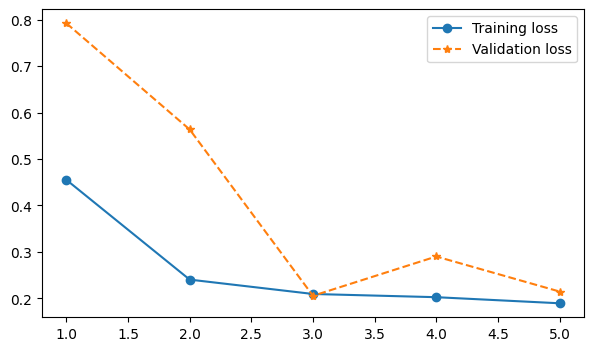

In [109]:
plt.figure(figsize=(7, 4))
ax = plt.axes()
ax.plot(range(1, epochs+1), history.history["loss"], marker="o", label="Training loss")
ax.plot(range(1, epochs+1), history.history["val_loss"], marker="*", ls="--", label="Validation loss")
ax.legend()
plt.show()

## Plot accuracy

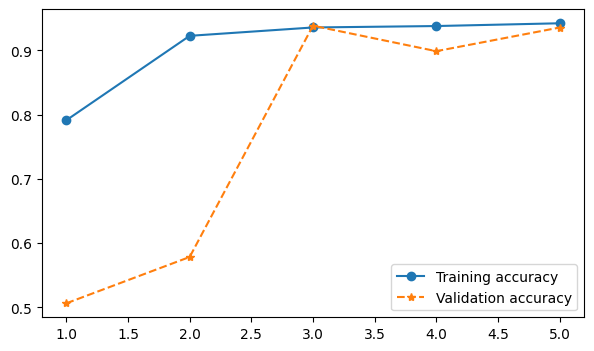

In [110]:
plt.figure(figsize=(7, 4))
ax = plt.axes()
ax.plot(range(1, epochs+1), history.history["accuracy"], marker="o", label="Training accuracy")
ax.plot(range(1, epochs+1), history.history["val_accuracy"], marker="*", ls="--", label="Validation accuracy")
ax.legend()
plt.show()

# Prediction

In [111]:
y_pred_proba = model.predict(validation_data).flatten()
y_pred_classes = (y_pred_proba >= 0.5).astype(np.int32)

259/259 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step


# Model Evaluate

In [127]:
def evaluate_ramdom_image(path, ax):
    image = load_img(str(path), target_size=(img_width, img_height))
    img_arr = img_to_array(image)
    img_arr /= 255
    pred = model.predict(img_arr.reshape(1, *img_arr.shape), verbose=0).flatten()
    label = "Parasitised" if pred < 0.5 else "Uninfected"
    ax.imshow(img_arr, vmin=1, vmax=1)
    ax.set_title(f"{label}", size=10)
    ax.axis("off")
    # plt.show()

In [128]:
parasitized_path = list(data_dir.glob("Parasitized/*"))
uninfected_path = list(data_dir.glob("Uninfected/*"))

## Plot 

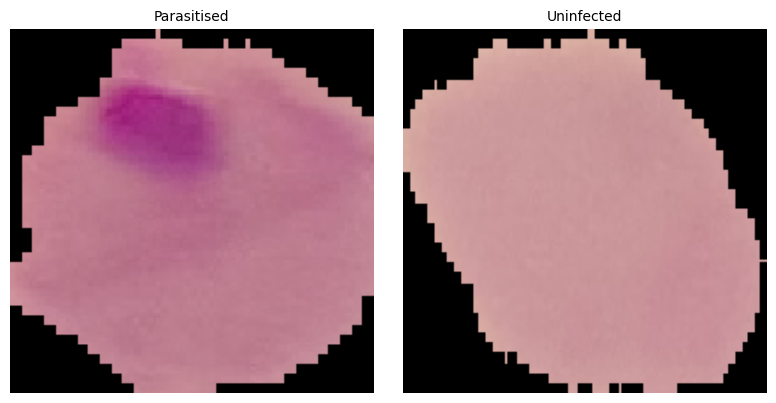

In [130]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
index = np.random.randint(len(parasitized_path))
evaluate_ramdom_image(parasitized_path[index], ax1)
evaluate_ramdom_image(uninfected_path[index], ax2)
plt.tight_layout()

## Predict user image

In [131]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

def evaluate_user_image(image_path, model, img_width, img_height):
    """
    Evaluates a single image provided by the user.

    Parameters:
        image_path (str): Path to the image file.
        model (keras.Model): Trained model for prediction.
        img_width (int): Target width for resizing the image.
        img_height (int): Target height for resizing the image.
    """
    # Load and preprocess the image
    image = load_img(image_path, target_size=(img_width, img_height))
    img_arr = img_to_array(image)
    img_arr /= 255  # Normalize pixel values

    # Make a prediction
    pred = model.predict(img_arr.reshape(1, *img_arr.shape), verbose=0).flatten()
    label = "Parasitised" if pred < 0.5 else "Uninfected"

    # Display the image with the prediction
    plt.imshow(img_arr)
    plt.title(f"Prediction: {label}", fontsize=12)
    plt.axis("off")
    plt.show()

In [132]:
image_path = "/Users/majeedjamakhani/MJ-IMM/Personal/Learn-update/AI-Book/Malaria_AI/Data/Parasitized/C33P1thinF_IMG_20150619_115740a_cell_161.png"


In [135]:
# Load test model from .h5 as test_model

test_model = tf.keras.models.load_model("/Users/majeedjamakhani/MJ-IMM/Personal/Learn-update/AI-Book/Malaria_AI/Models/malaria_AI_model.h5")
test_model

<Functional name=functional_13, built=True>

## Model Image width and Height
our model img_width and img_height are as follows
mg_width=150, img_height=150

In [138]:
image_path = "/Users/majeedjamakhani/MJ-IMM/Personal/Learn-update/AI-Book/Malaria_AI/Data/Uninfected/C1_thinF_IMG_20150604_104722_cell_60.png"



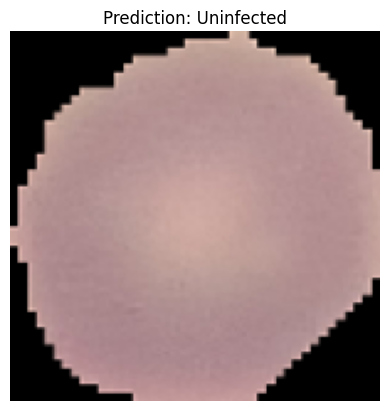

In [140]:
evaluate_user_image(image_path, model = test_model , img_width=150, img_height=150)